# Visialization of cine-MRI data and abdominal cavity segmentation

In [41]:
import os
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
%matplotlib inline

# TODO refactor and maybe show some metadata

In [20]:
np.random.seed(99)
random.seed(99)

In [115]:
data_path = "../../data/cinemri_mha/rijnstate"
images_folder = "images"
segmentations_folder = "cavity_segmentations"
images_path = os.path.join(data_path, images_folder)
segmentations_path = os.path.join(data_path, segmentations_folder)

In [116]:
# Get patients ids from images folder structure
patients_images = [f.name for f in os.scandir(images_path) if f.is_dir()]
segmentations_images = [f.name for f in os.scandir(segmentations_path) if f.is_dir()]

print(len(patients_images))
print(len(segmentations_images))

63
62


In [117]:
print(patients_images)
print(segmentations_images)

['ANONIGTEPE17R', 'ANONQ923RE1U7', 'ANON4003RE122', 'ANON0V13RE11U', 'ANONC623RE1MF', 'ANONHQ03RE1LU', 'ANON0603RE1RU', 'ANONKGV2RE1N2', 'ANONC423RE1AB', 'ANONHOV2RE1PO', 'ANONTN13RE127', 'ANON78V2RE1J5', 'ANON8AV2RE1FH', 'ANONE103RE1S5', 'ANON30V2RE10K', 'ANONRJTEPE1KA', 'ANONUS03RE1U2', 'ANON0P03RE1MR', 'ANONA523RE1VM', 'ANON8913RE1EF', 'ANONP1V2RE161', 'ANONSR03RE19I', 'ANONF013RE1H6', 'ANONP703RE127', 'ANONBL13RE1F4', 'ANON7V03RE1ON', 'ANONK823RE1I8', 'ANONN723RE1UR', 'ANONJRTEPE1NJ', 'ANON5413RE145', 'ANON7OTEPE1UD', 'ANONKBV2RE1R5', 'ANONCN03RE1L0', 'ANONGB03RE1P3', 'ANONOUV2RE1GP', 'ANONP203RE1JR', 'ANON7613RE1S5', 'ANON7713RE17I', 'ANON1VU2RE1NJ', 'ANON4I13RE1BS', 'ANONO023RE1E2', 'ANON1SU2RE1C9', 'ANONIR13RE1OS', 'ANON85TEPE13J', 'ANONFDV2RE1BC', 'ANONKC13RE1LE', 'ANONP5AEPE1G8', 'ANONVLTEPE1DL', 'ANONBQV2RE1TL', 'ANONSL03RE121', 'ANON8P13RE1JB', 'ANONBC03RE1U1', 'ANON2403RE1ES', 'ANON4SV2RE1ET', 'ANONP113RE113', 'ANONTD03RE1GD', 'ANONU903RE1HQ', 'ANON1B13RE1B9', 'ANON3503RE18

In [119]:
test = []
for patient_id in patients_images:
    if not (patient_id in segmentations_images):
        test.append(patient_id)
        
print(test)

['ANON7OTEPE1UD']


In [33]:
# sample a few random scans
N = 1
patients = random.sample(patients_images, N)
print(patients)

['ANON1VU2RE1NJ']


In [35]:
# get the first examination dir
patient_images_dir = os.path.join(images_path, patients[0])
examinations = [f.name for f in os.scandir(patient_images_dir) if f.is_dir()]
examination = examinations[0]
print(examination)

1.2.752.24.7.621449243.4402848


In [39]:
# get the first scan
examination_dir = os.path.join(patient_images_dir, examination)
scans = glob.glob(examination_dir + '/*.mha')
print(scans)

['../../data/cinemri_mha/rijnstate/images/ANON1VU2RE1NJ/1.2.752.24.7.621449243.4402848/1.3.12.2.1107.5.2.30.26380.2019031314274580376570285.0.0.0.mha', '../../data/cinemri_mha/rijnstate/images/ANON1VU2RE1NJ/1.2.752.24.7.621449243.4402848/1.3.12.2.1107.5.2.30.26380.2019031314235110115069666.0.0.0.mha', '../../data/cinemri_mha/rijnstate/images/ANON1VU2RE1NJ/1.2.752.24.7.621449243.4402848/1.3.12.2.1107.5.2.30.26380.2019031314270989144370161.0.0.0.mha', '../../data/cinemri_mha/rijnstate/images/ANON1VU2RE1NJ/1.2.752.24.7.621449243.4402848/1.3.12.2.1107.5.2.30.26380.2019031314260021715469913.0.0.0.mha', '../../data/cinemri_mha/rijnstate/images/ANON1VU2RE1NJ/1.2.752.24.7.621449243.4402848/1.3.12.2.1107.5.2.30.26380.2019031314263072387770037.0.0.0.mha', '../../data/cinemri_mha/rijnstate/images/ANON1VU2RE1NJ/1.2.752.24.7.621449243.4402848/1.3.12.2.1107.5.2.30.26380.2019031314253781003469789.0.0.0.mha', '../../data/cinemri_mha/rijnstate/images/ANON1VU2RE1NJ/1.2.752.24.7.621449243.4402848/1.3.12.

In [43]:
# visualize one scan
index = 0
scan = scans[index]
series = sitk.ReadImage(scan)
print(series)

Image (0x7f98c7aff2e0)
  RTTI typeinfo:   itk::Image<unsigned short, 3u>
  Reference Count: 1
  Modified Time: 984
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 956
  UpdateMTime: 983
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [192, 256, 30]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [192, 256, 30]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [192, 256, 30]
  Spacing: [1.5625, 1.5625, 1]
  Origin: [59.3594, -154.017, 147.088]
  Direction: 
0 0 -1
1 0 0
0 -1 0

  IndexToPointMatrix: 
0 0 -1
1.5625 0 0
0 -1.5625 0

  PointToIndexMatrix: 
0 0.64 0
0 0 -0.64
-1 0 0

  Inverse Direction: 
0 1 0
0 0 -1
-1 0 0

  PixelContainer: 
    ImportImageContainer (0x7f98c7aff5b0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned short>
  

In [44]:
series_np = sitk.GetArrayFromImage(series)
n_frames = series_np.shape[0]

(256, 192)


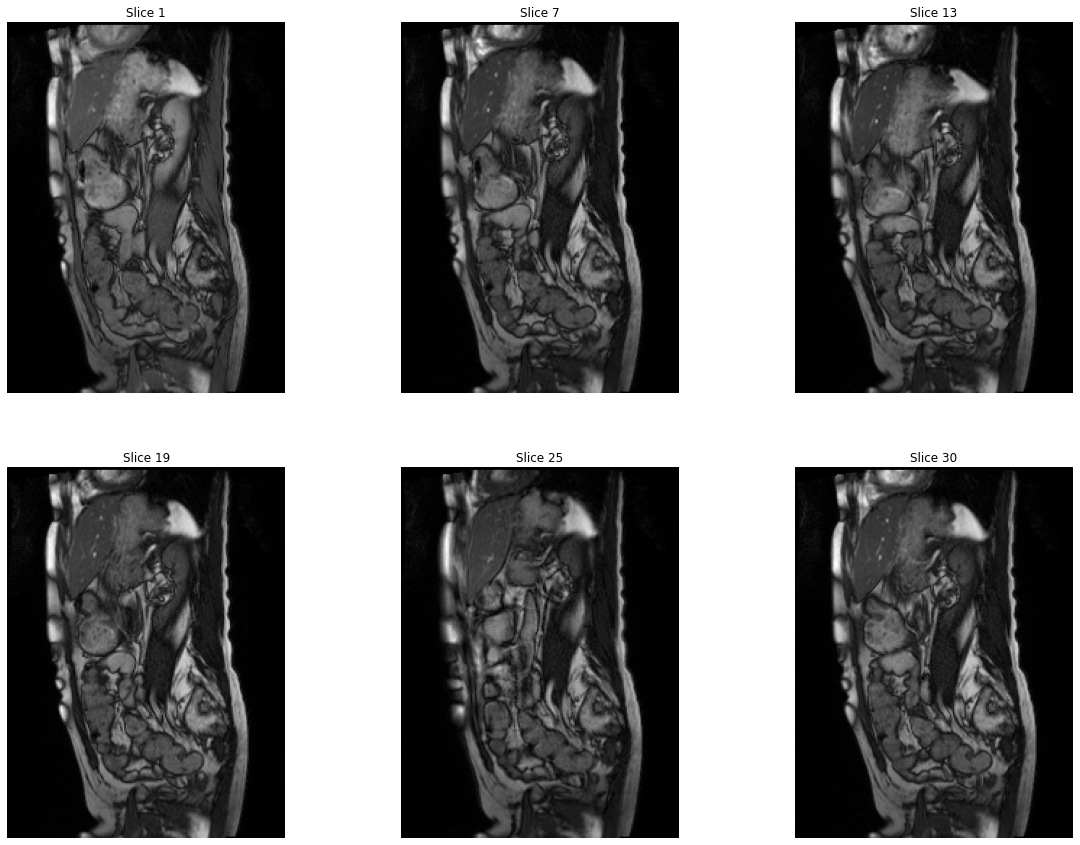

In [94]:
# Showing 6 slices of cine-MRI scan
def show_slices(series, slices = [0, 6, 12, 18, 24, 29]):
    nrow = 2
    ncol = 3

    plt.figure(figsize=(20,15))
    pos = 0
    for i in range(nrow):
        for j in range(ncol):
            image = series_np[slices[pos]]
            # Normalize
            image = image / image.max()

            pos += 1
            plt.subplot(nrow, ncol, pos)
            plt.imshow(image, cmap="gray")
            plt.axis('off')
            plt.title('Slice {}'.format(slices_to_show[pos - 1]))

    plt.show()
    
show_slices(series)

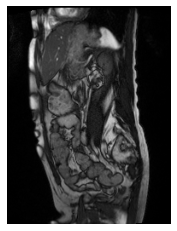

In [77]:
# Show an animated cine-MRI scan
from matplotlib import animation, rc

def animated_scan(scan):
    fig, ax = plt.subplots()

    ims = []
    first = True
    for cine_slice in series_np:
        im = ax.imshow(cine_slice, cmap="gray", animated=True)
        ax.axis('off')
        if first:
            first = False
            ax.imshow(cine_slice, cmap="gray")  # show an initial one first
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat_delay=1000)

    rc('animation', html='jshtml')
    return ani
    
animation = animated_scan(series_np)
animation

In [79]:
# Show image and mask
# Now only the first frame is annotated and only some scans are annotated
# First get existing masks, then load the corresponding images

# get the first examination dir
patient_segmentation_dir = os.path.join(segmentations_path, patients[0])
examinations_seg = [f.name for f in os.scandir(patient_segmentation_dir) if f.is_dir()]
examination_seg = examinations_seg[0]
print(examination_seg)

1.2.752.24.7.621449243.4402848


In [83]:
examination_seg_path = os.path.join(patient_segmentation_dir, examination_seg)
segmented_scans = [f for f in os.listdir(examination_seg_path) if os.path.isfile(os.path.join(examination_seg_path, f))]

../../data/cinemri_mha/rijnstate/images/ANON1VU2RE1NJ/1.2.752.24.7.621449243.4402848/1.3.12.2.1107.5.2.30.26380.2019031314235110115069666.0.0.0.mha
../../data/cinemri_mha/rijnstate/cavity_segmentations/ANON1VU2RE1NJ/1.2.752.24.7.621449243.4402848/1.3.12.2.1107.5.2.30.26380.2019031314235110115069666.0.0.0.mha


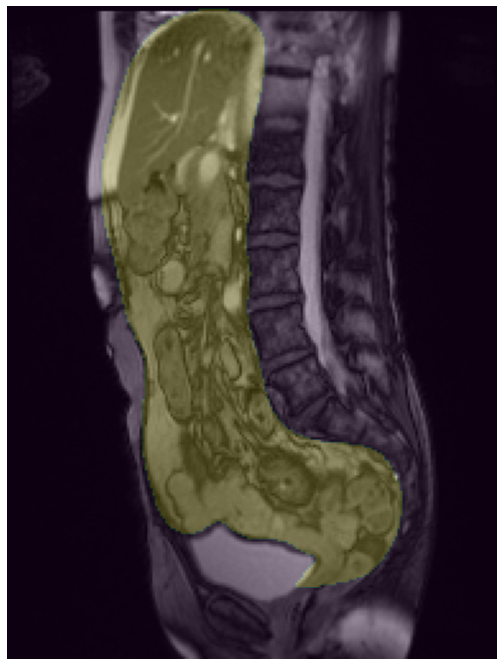

../../data/cinemri_mha/rijnstate/images/ANON1VU2RE1NJ/1.2.752.24.7.621449243.4402848/1.3.12.2.1107.5.2.30.26380.2019031314253781003469789.0.0.0.mha
../../data/cinemri_mha/rijnstate/cavity_segmentations/ANON1VU2RE1NJ/1.2.752.24.7.621449243.4402848/1.3.12.2.1107.5.2.30.26380.2019031314253781003469789.0.0.0.mha


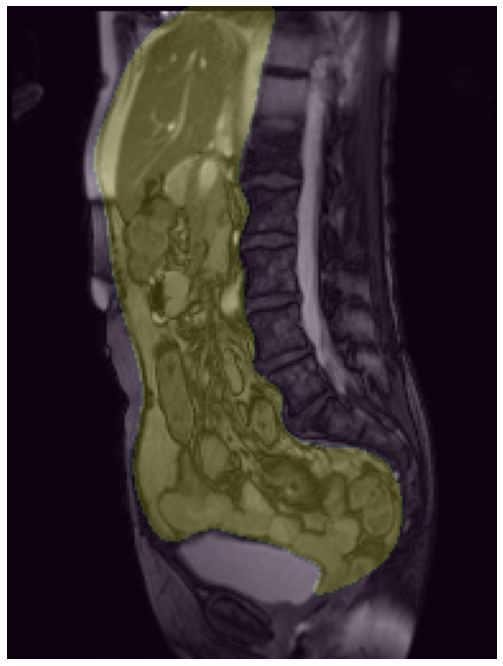

In [105]:
for file_name in segmented_scans: 
    scan_path = os.path.join(examination_dir, file_name)
    print(scan_path)
    segmentation_path = os.path.join(examination_seg_path, file_name)
    print(segmentation_path)
    
    scan_series = sitk.ReadImage(scan_path)
    scan_series = sitk.GetArrayFromImage(scan_series)
    
    segmentation_series = sitk.ReadImage(segmentation_path)
    segmentation_series = sitk.GetArrayFromImage(segmentation_series)
    
    inds = [0]
    for ind in inds:
        plt.figure(figsize=(16, 12))
        
        scan = scan_series[ind]
        # Normalize
        scan = scan / scan.max()
        segmentation = segmentation_series[ind]

        plt.imshow(scan, cmap="gray")
        plt.imshow(segmentation, alpha=0.2)
        plt.axis('off')
        plt.show()